In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
loans = pd.read_csv('kiva_loans.csv')
loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [0]:
lenders = pd.read_csv('lenders.csv')



In [0]:
loans = loans.drop(['repayment_interval','date','use','id','tags', 
                  'funded_amount','term_in_months','partner_id',
                  'region','posted_time', 'disbursed_time', 'funded_time',],axis=1)
loans = loans.fillna('unknown')
loans.loc[loans['borrower_genders'].str.contains('emale'), 'borrower_genders'] = 'female'
loans.loc[loans['borrower_genders'].str.contains(', male'), 'borrower_genders'] = 'male'

loans.borrower_genders.value_counts()

In [0]:
loans.head()

,loan_amount,activity,sector,country_code,country,currency,lender_count,borrower_genders
0,300,Fruits & Vegetables,Food,PK,Pakistan,PKR,12,female
1,575,Rickshaw,Transportation,PK,Pakistan,PKR,14,female
2,150,Transportation,Transportation,IN,India,INR,6,female
3,200,Embroidery,Arts,PK,Pakistan,PKR,8,female
4,400,Milk Sales,Food,PK,Pakistan,PKR,16,female


In [0]:
lenders.head()

,permanent_name,display_name,city,state,country_code,member_since,occupation,loan_because,loan_purchase_num,invited_by,num_invited
0,qian3013,Qian,NaN,NaN,NaN,1461300457,NaN,NaN,1.0,NaN,0.0
1,reena6733,Reena,NaN,NaN,NaN,1461300634,NaN,NaN,9.0,NaN,0.0
2,mai5982,Mai,NaN,NaN,NaN,1461300853,NaN,NaN,NaN,NaN,0.0
3,andrew86079135,Andrew,NaN,NaN,NaN,1461301091,NaN,NaN,5.0,Peter Tan,0.0
4,nguyen6962,Nguyen,NaN,NaN,NaN,1461301154,NaN,NaN,NaN,NaN,0.0


In [0]:
lenders = lenders.drop(['permanent_name', 'display_name', 'city', 'state',
                 'member_since', 'occupation', 'loan_because',
                 'invited_by', 'num_invited'],axis=1)
lenders.rename(columns= {"country_code":"state"}, inplace=True)
lenders = lenders[pd.isnull(lenders['state']) == False]
lenders = lenders.groupby('state').filter(lambda x : len(x)>300)

In [0]:
print(lenders.shape)
print(lenders.state.value_counts())

(202002, 2)
US    160661
CA     11986
GB      7813
AU      3657
NL      1511
LA      1396
IN      1385
DE      1384
FR      1380
PL      1295
NO      1132
SE      1037
BR       920
AR       785
IT       759
ES       668
DK       640
JP       615
PT       596
ID       543
CH       387
SG       386
IE       373
FI       351
NZ       342
Name: state, dtype: int64


In [0]:
lenders.head()

,state,loan_purchase_num
16,US,3.0
31,US,1.0
37,IN,2.0
39,US,2.0
42,US,NaN


In [0]:
themes = pd.read_csv('loan_themes_by_region.csv')

In [0]:
print(themes.shape)
print(themes.columns)

(15736, 21)
Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')


In [0]:
themes = themes.drop(['LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct','forkiva', 'region', 
                      'geocode_old', 'ISO','number','Partner ID', 
                      'Field Partner Name', 'sector', 'Loan Theme ID' ],axis=1)
themes.rename(columns= {'Loan Theme Type':"theme"}, inplace=True)
themes = themes.groupby('country').filter(lambda x : len(x)>130)

In [0]:
amounts = themes.groupby('country').agg(sum)
amounts = amounts.sort_values(by=['amount'],ascending=False).reset_index()


In [0]:
amounts.head()

,country,amount
0,Philippines,34315925
1,Kenya,19526800
2,Paraguay,19510150
3,Peru,18965275
4,El Salvador,13427925


In [0]:
themes.loc[themes['theme'].str.contains('Mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Clean'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('Vulnerable'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Chance'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Finance'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('bank'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Loan'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Youth'), 'theme'] = 'Youth'
themes.loc[themes['theme'].str.contains('Transactions'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Agriculture'), 'theme'] = 'Agriculture'
themes.loc[themes['theme'].str.contains('Mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Water'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('ducation'),'theme'] = 'Education'
themes.loc[themes['theme'].str.contains('Water'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Underserved'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Artisan'), 'theme'] = 'SME'
themes.loc[themes['theme'].str.contains('Bio'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('loan'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Sanitation'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('credit'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Solar'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('Small'), 'theme'] = 'SME'
themes.loc[themes['theme'].str.contains('gricultural'), 'theme'] = 'Agriculture'
themes.loc[themes['theme'].str.contains('Displaced'), 'theme'] = 'Housing'
themes.loc[themes['theme'].str.contains('Housing'), 'theme'] = 'Housing'
themes.loc[themes['theme'].str.contains('omen'), 'theme'] = 'Women'

#for i, row in themes[['theme']].iterrows():
 #   if ('Women' in themes.at[i,'theme']) == True : 
  #    themes.at[i,'theme'] = 'Women'

In [0]:
themes = themes.groupby('theme').filter(lambda x : len(x)>100)



In [0]:
themes.country.value_counts()
themes.shape

(12140, 3)

In [0]:
import requests
from bs4 import BeautifulSoup


def urls(url):
  r = requests.get(url)
  r.content
  soup= BeautifulSoup(r.content, 'html.parser')
  return soup

In [0]:


url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
  
soup = urls(url)
  
table=soup.find_all('table',{'class':'wikitable'})

rows=table[0].find_all('tr')
rows=[row.text.strip().split('\n') for row in rows]



In [0]:

def restr(x):
    if len(x)>4:
        x[3]=='\n'.join(x[3:])
        del x[4:]
    elif len(x)==3:
        x.append("")
    return x
rows=[restr(x) for x in rows]



  

In [0]:
import pandas as pd
df=pd.DataFrame([len(x) for x in rows])
df[0].value_counts()
colnames = rows[0]
data = rows[1:]

df = pd.DataFrame(data, columns=colnames)
df.rename(index=str, columns={'':'Country',
                                'Country/Territory':'GDP'}, inplace=True)

df1 = df.iloc[:,0:3]




In [0]:
amounts.shape 

(28, 2)

In [0]:

#df2['Country'] =[ i.replace('\xa0', '') for i in df2['Country']]
#df1['Country'] = df1['Country'].str.join
#df2.Country[117]

#df2 = df1
#df2.head()


df1.Country=[' '.join(i) for i in df1.Country.str.split()]

df1.Country[120]


'Belize'

In [0]:
merged = df1.merge(amounts, left_on='Country', right_on='country', how='inner')


In [0]:
merged = merged.drop(['country'],axis=1)



In [0]:
merged = merged.sort_values('amount')
merged.head()

,Rank,Country,GDP,amount
24,153,Lesotho,"3,494",430700
1,77,Costa Rica,"17,559",1140925
8,101,Georgia,"11,485",1501850
6,96,Indonesia,"13,230",2715975
21,143,Kyrgyzstan,"3,844",2866975


In [0]:

url2 = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
  
soup2 = urls(url2)
  
table2=soup2.find_all('table',{'class':'wikitable'})
rows2=table2[0].find_all('tr')
rows2=[row.text.strip().split('\n') for row in rows2]

def essai(x):
    if len(x)>4:
        x[3]=='\n'.join(x[5:])
        del x[5:]
    elif len(x)==3:
        x.append("")
    return x

rows2=[essai(x) for x in rows2]

p=pd.DataFrame([len(x) for x in rows2])
p[0].value_counts()
colnames = rows2[0]
data = rows2[1:]
peeps = pd.DataFrame(data, columns=colnames)

In [0]:
pops = peeps.drop(['Rank', 'Date','Country(or dependent territory)'
       ],axis=1)
pops.rename(index=str, columns={'% of worldpopulation':'Population',
                               'Population':'Country' 
                             }, inplace=True)

pops.columns

Index(['Country', 'Population'], dtype='object')

In [0]:
import re
pops.Country = pops.Country.apply(lambda x : (re.split(r'\[',x)[0].strip()))

#re.match('.+?(?=\[)', 'abcd[ef')[0]

In [0]:
df3 = merged.merge(pops, left_on='Country', right_on='Country', how='inner')

df3.head()


,Rank,Country,GDP,amount,Population
0,153,Lesotho,"3,494",430700,"2,007,201"
1,77,Costa Rica,"17,559",1140925,"5,058,007"
2,101,Georgia,"11,485",1501850,"3,723,500"
3,96,Indonesia,"13,230",2715975,"268,074,600"
4,143,Kyrgyzstan,"3,844",2866975,"6,389,500"


In [0]:

df3.Population=df3.Population.str.replace(",","").astype(int)
df3.GDP=df3.GDP.str.replace(",","").astype(int)
df3.Rank=df3.Rank.astype(int)


df3.dtypes


Rank           int64
Country       object
GDP            int64
amount         int64
Population     int64
dtype: object

In [0]:
df3['Funding_p1000'] = df3.amount / df3.Population * 1000
# number of dollars received per countries for 1'000 people

In [0]:

countries = pd.DataFrame(themes.country.value_counts().reset_index())
countries.columns = ['countries', 'count']

df4 = df3.merge(countries, left_on='Country', right_on='countries', how='inner')




In [0]:
df4 = df4.drop(['countries'],axis=1)

In [0]:
df4['Avg_funding'] = round(df4.amount/df4['count'],0)

df4['Projects_p1MLN'] = round(df4['count']*1000000/df4.Population,1)


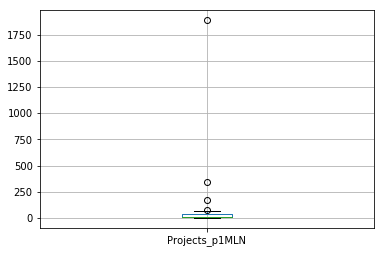

In [0]:
df4.boxplot(column='Projects_p1MLN')

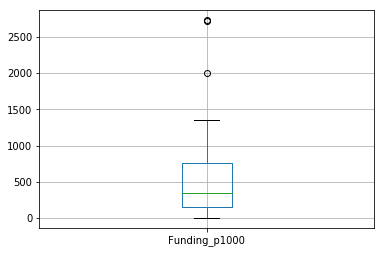

In [0]:

df4 = df4.loc[df4['Projects_p1MLN']!=df4['Projects_p1MLN'].max()]
df4.boxplot(column='Funding_p1000')


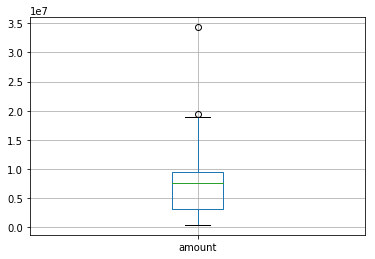

In [0]:

df4 = df4.loc[df4['Funding_p1000']!=df4['Funding_p1000'].max()]

df4.boxplot(column='amount')


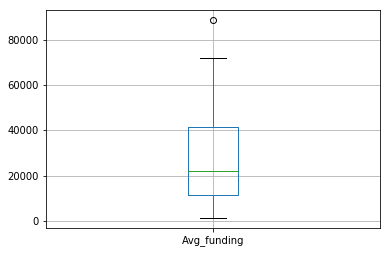

In [0]:
df4 = df4.loc[df4['amount']!=df4['amount'].max()]
df4.boxplot(column='Avg_funding')


In [0]:
df8 = df4.loc[df4['Avg_funding']!=df4['Avg_funding'].max()]


# number of projects per country for 1 million people

df8.head()


,Rank,Country,GDP,amount,Population,Funding_p1000,count,Avg_funding,Projects_p1MLN
0,153,Lesotho,3494,430700,2007201,214.577414,336,1282.0,167.4
1,77,Costa Rica,17559,1140925,5058007,225.568094,127,8984.0,25.1
2,101,Georgia,11485,1501850,3723500,403.343628,296,5074.0,79.5
3,96,Indonesia,13230,2715975,268074600,10.131415,130,20892.0,0.5
4,143,Kyrgyzstan,3844,2866975,6389500,448.700994,405,7079.0,63.4


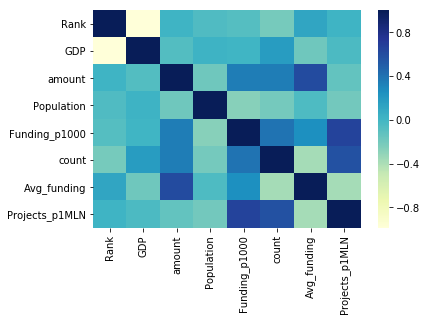

In [0]:
sns.heatmap(df8.corr(), cmap='YlGnBu')


In [0]:
df8.corr()

,Rank,GDP,amount,Population,Funding_p1000,count,Avg_funding,Projects_p1MLN
Rank,1.000000,-0.986018,0.016628,-0.053942,-0.074916,-0.204562,0.119783,0.017160
GDP,-0.986018,1.000000,-0.063240,0.026442,0.011811,0.184825,-0.171868,-0.037246
amount,0.016628,-0.063240,1.000000,-0.174337,0.354218,0.349328,0.612330,-0.124973
Population,-0.053942,0.026442,-0.174337,1.000000,-0.271170,-0.197060,-0.043325,-0.189665
Funding_p1000,-0.074916,0.011811,0.354218,-0.271170,1.000000,0.401325,0.261315,0.659642
count,-0.204562,0.184825,0.349328,-0.197060,0.401325,1.000000,-0.367374,0.575086
Avg_funding,0.119783,-0.171868,0.612330,-0.043325,0.261315,-0.367374,1.000000,-0.367585
Projects_p1MLN,0.017160,-0.037246,-0.124973,-0.189665,0.659642,0.575086,-0.367585,1.000000


(0, 21000000)

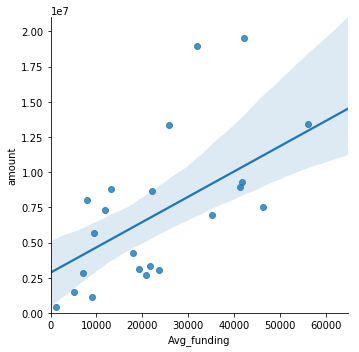

In [0]:
sns.lmplot('Avg_funding','amount',data=df8)
plt.xlim(0, 65000)

plt.ylim(0, 21000000)


(0, 21000000)

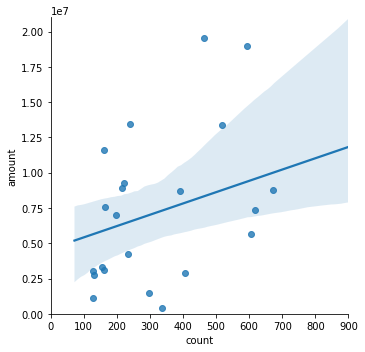

In [0]:
sns.lmplot('count','amount',data=df8)
plt.xlim(0, 900)
plt.ylim(0, 21000000)


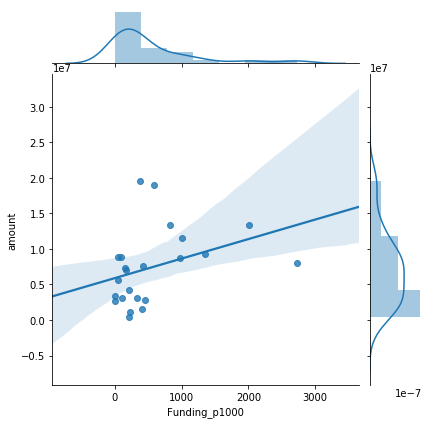

In [0]:
sns.jointplot(y='amount',x='Funding_p1000',data=df8, kind='reg')


http://www.uta.fi/yky/en/studies/disciplines/northamericanstudies/summer_school/2013_Yan_Chen_Kiva_Experiment_2013_06_60min.pdf
https://hackernoon.com/community-focused-growth-8a4c5a686def
slides https://slideplayer.com/slide/4061274/

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [0]:
X=df8.assign(const=1)


In [0]:
X = X.drop(['Country'], axis=1)
#X.dtypes

pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)


Rank                50.716338
GDP                 50.003160
amount               5.791034
Population           1.223103
Funding_p1000        4.599653
count                5.798170
Avg_funding          6.093497
Projects_p1MLN       5.455246
const             1991.676873
dtype: float64

In [0]:
!pip install scipy==1.2

In [0]:
import statsmodels.formula.api as smf


In [0]:
def get_vif(exogs,data):
    vif_array=np.array([])
    tolerance_array=np.array([])
    
    for exog in exogs:
        not_exog=[i for i in exogs if i!=exog]
        formula=f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared=smf.ols(formula,data=data).fit().rsquared
        
        vif=1/(1-r_squared)
        vif_array=np.append(vif_array,vif).round(2)
        
        tolerance=1-r_squared
        tolerance_array=np.append(tolerance_array,tolerance).round(2)
    df_vif=pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [0]:
#df4 = df4.drop(['Funding_p1000'], axis=1)
#df4 = df4.drop(['count'], axis=1)
#df4 = df4.drop(['Population'], axis=1)
#df9 = df9.drop(['Country'], axis=1)


Country           object
GDP                int64
amount             int64
Population         int64
Funding_p1000    float64
count              int64
Avg_funding      float64
dtype: object

In [0]:

df9 = df8.drop(['Country'], axis=1)
df9 = df9.drop(['Rank'], axis=1)
get_vif(exogs=df9.columns,data=df8)



,VIF,Tolerance
GDP,1.23,0.81
amount,5.73,0.17
Population,1.10,0.91
Funding_p1000,4.35,0.23
count,5.63,0.18
Avg_funding,5.89,0.17
Projects_p1MLN,5.40,0.19


In [0]:
df9=(df9-df9.mean())/df9.std()
df9.shape


(23, 7)

In [0]:
df9

,GDP,amount,Population,Funding_p1000,count,Avg_funding,Projects_p1MLN
0,-0.983769,-1.323707,-0.360320,-0.496502,-0.059743,-1.338057,1.683520
1,1.738945,-1.189073,-0.349425,-0.480362,-0.968550,-0.909946,-0.205534
2,0.563135,-1.120655,-0.354191,-0.219289,-0.233677,-1.127281,0.516634
3,0.900933,-0.890499,0.589879,-0.796742,-0.955505,-0.248047,-0.532103
4,-0.916016,-0.861875,-0.344670,-0.152679,0.240294,-1.015835,0.302904
5,-0.651197,-0.828966,-0.334781,-0.324060,-0.959853,-0.099192,-0.351561
6,-0.411157,-0.814488,-0.259347,-0.660455,-0.820706,-0.333202,-0.468382
7,-0.135885,-0.773120,4.449268,-0.807989,-0.851144,-0.205525,-0.537413
9,-1.198644,-0.603294,-0.296159,-0.500525,-0.503275,-0.404295,-0.383421
10,2.328011,-0.328794,0.084555,-0.745732,1.109966,-0.887546,-0.475019


In [0]:

results = smf.ols(' Avg_funding ~ Projects_p1MLN+amount', data=df9).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Avg_funding   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8.553
Date:                Fri, 21 Jun 2019   Prob (F-statistic):            0.00207
Time:                        12:32:13   Log-Likelihood:                -25.017
No. Observations:                  23   AIC:                             56.03
Df Residuals:                      20   BIC:                             59.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.551e-17      0.161  -3.46e

In [0]:
loans.head()

,loan_amount,activity,sector,country_code,country,currency,lender_count,borrower_genders
0,300,Fruits & Vegetables,Food,PK,Pakistan,PKR,12,female
1,575,Rickshaw,Transportation,PK,Pakistan,PKR,14,female
2,150,Transportation,Transportation,IN,India,INR,6,female
3,200,Embroidery,Arts,PK,Pakistan,PKR,8,female
4,400,Milk Sales,Food,PK,Pakistan,PKR,16,female


In [0]:
loans2 = loans.loc[loans['borrower_genders']!='unknown']
loans2.head()


,loan_amount,activity,sector,country_code,country,currency,lender_count,borrower_genders
0,300,Fruits & Vegetables,Food,PK,Pakistan,PKR,12,female
1,575,Rickshaw,Transportation,PK,Pakistan,PKR,14,female
2,150,Transportation,Transportation,IN,India,INR,6,female
3,200,Embroidery,Arts,PK,Pakistan,PKR,8,female
4,400,Milk Sales,Food,PK,Pakistan,PKR,16,female


In [0]:
amounts_pG = loans2.groupby(['country','borrower_genders']).agg(sum)
amounts_pG = amounts_pG.reset_index()

amounts_pG=amounts_pG.drop(['activity', 'sector', 'country_code', 'currency'],axis=1)
amounts_pG.columns



Index(['country', 'borrower_genders', 'loan_amount', 'lender_count'], dtype='object')

In [0]:
amounts_pG.head()


,country,borrower_genders,loan_amount,lender_count
0,Albania,female,257900.0,9072.0
1,Albania,male,230575.0,7938.0
2,Armenia,female,1431000.0,40253.0
3,Armenia,male,416525.0,11588.0
4,Azerbaijan,female,282050.0,8589.0


In [0]:
amounts_pG['isFemale']=[1 if i == 'female' else 0 for i in amounts_pG.borrower_genders]
amounts_pG['Avg_funding'] = round(amounts_pG.loan_amount/amounts_pG['lender_count'],0)



In [0]:
amounts_pG = amounts_pG.sort_values('lender_count' )
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']>1000]

amounts_pG.head()


,country,borrower_genders,loan_amount,lender_count,isFemale,Avg_funding
37,Ghana,male,30125.0,1002.0,0,30.0
59,Kyrgyzstan,male,34600.0,1021.0,0,34.0
21,Cameroon,male,35425.0,1207.0,0,29.0
41,Haiti,male,38875.0,1324.0,0,29.0
115,Togo,male,45400.0,1338.0,0,34.0


In [0]:
amounts_pG = amounts_pG.drop(['country'],axis=1)
amounts_pG = amounts_pG.drop(['borrower_genders'],axis=1)


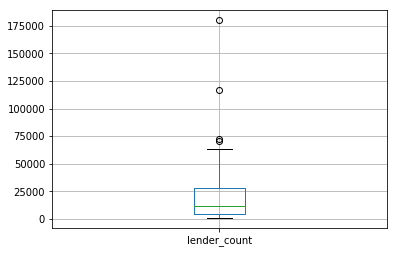

In [0]:
amounts_pG.boxplot(column='lender_count')

In [0]:
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']!=0]
amounts_pG = amounts_pG.loc[amounts_pG['Avg_funding']<50]
amounts_pG = amounts_pG.loc[amounts_pG['loan_amount']<9000000]
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']<500000]

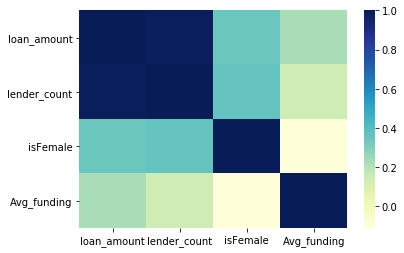

In [0]:

sns.heatmap(amounts_pG.corr(), cmap='YlGnBu')


In [0]:
amounts_pG.corr()

,loan_amount,lender_count,isFemale,Avg_funding
loan_amount,1.000000,0.991418,0.353715,0.227041
lender_count,0.991418,1.000000,0.363109,0.143231
isFemale,0.353715,0.363109,1.000000,-0.109912
Avg_funding,0.227041,0.143231,-0.109912,1.000000


In [0]:
from scipy.stats import kstest

for i in amounts_pG:
    print(kstest(amounts_pG[i],'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=2.45689253611757e-24)
KstestResult(statistic=1.0, pvalue=0.0)


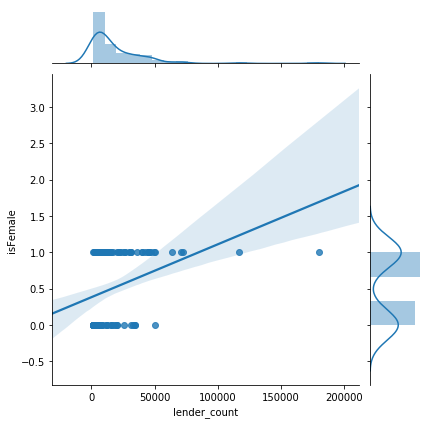

In [0]:
sns.jointplot(y='isFemale',x='lender_count',data=amounts_pG, kind='reg')


(0, 50000)

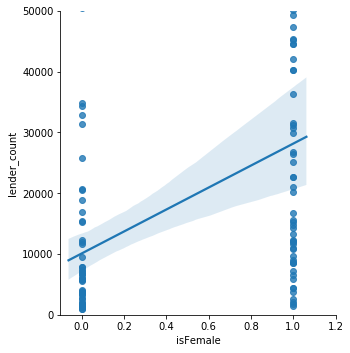

In [0]:
sns.lmplot('isFemale','lender_count',data=amounts_pG)
plt.xlim(-0.1, 1.2)
plt.ylim(0, 50000)

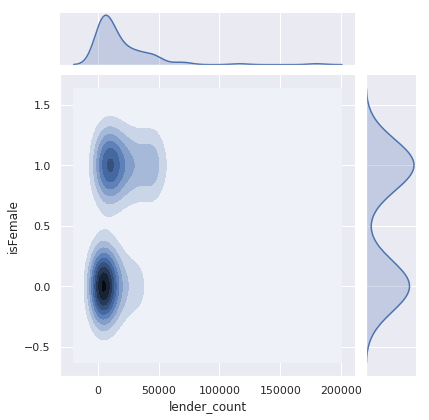

In [0]:
sns.jointplot('lender_count','isFemale', data = amounts_pG, kind = 'kde')


In [0]:
print('Maximum value for lender_count',amounts_pG.lender_count.max())
print(" ")
print('Last value for lender_count',amounts_pG.lender_count.iloc[-1])
print(" ")
print('Mean value for lender_count',round(amounts_pG.lender_count.mean(),0))
print(" ")
cnt = 20000
isf = 1





Maximum value for lender_count 179779.0
 
Last value for lender_count 179779.0
 
Mean value for lender_count 19567.0
 


In [0]:
X=[1,isf,np.log(cnt)]
results.params

print('Predicted with matrix multiplication ',np.dot(X,results.params))
print(" ")


Predicted with matrix multiplication  5.402573440094007
 


In [0]:
get_vif(['isFemale','np.log(lender_count)'],amounts_pG)

# Keeping in mind the thresholds(VIF<10, Tolerance>0.1) 
# we conclude the absence of multicollinearity between variables.



,VIF,Tolerance
isFemale,1.27,0.79
np.log(lender_count),1.27,0.79


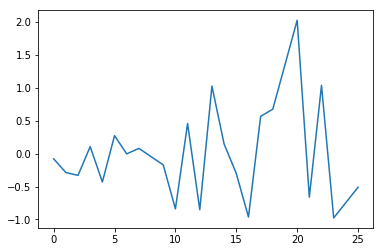

In [0]:
plt.plot(results.resid)


In [0]:
print (results.resid.sample(2).std(), results.resid.std(),results.resid.mean())

0.59907227884401 0.7341607374554304 3.37893964016352e-17


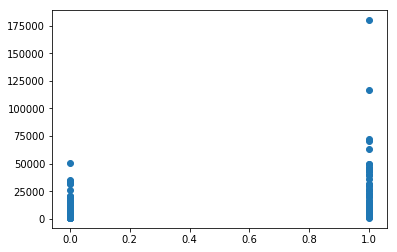

In [0]:
plt.scatter(amounts_pG.isFemale,amounts_pG.lender_count)


In [0]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

#Datapoints are a heteroskedastic



[('Lagrange multiplier statistic', 3.967957669444571),
 ('p-value', 0.13752097408308642),
 ('f-value', 2.0848827469630633),
 ('f p-value', 0.1505135467027834)]

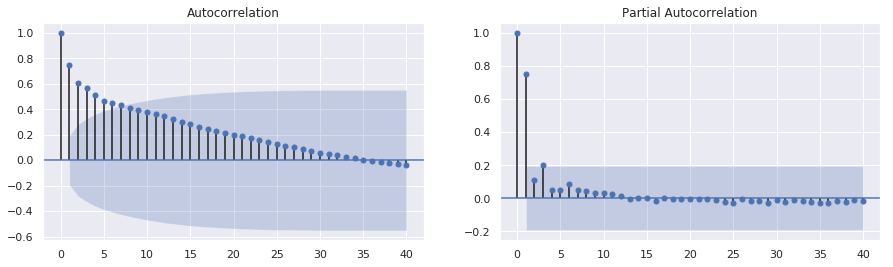

In [0]:
import statsmodels.api as sm

sns.set()
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(amounts_pG.iloc[1:]['lender_count'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(amounts_pG.iloc[1:]['lender_count'], lags=40, ax=axes[1])